# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha \frac{1}{n}\sum_{i=1}^{n}\nabla_wL(w_{old}, x_{i}, y_{i})
 = w_{old} - \alpha \frac{2}{n}\sum_{i=1}^{n}(((x_{i}, w) - y_{i}) \cdot x_{i} + \frac{1}{C}w)$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

Градиент - направление, по которому функция растёт быстрее всего.

***Ваше решение здесь***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha \frac{1}{n}\sum_{i=1}^{n}\nabla_wL(w_{old}, x_{i}, y_{i}) = w_{old} - \alpha\frac{1}{n}\sum_{i=1}^{n}((\sigma((x_{i}, w)) - y_{i}) \cdot x_{i} + \frac{2}{C}w)$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$Q = \frac{1}{N}||X\cdot w - y||^2 + \frac{1}{C} = \frac{1}{N}(X\cdot w - y)^T(X\cdot w - y) + \frac{1}{C}||w||^2$

$\nabla Q = \nabla\frac{1}{N}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty) + \nabla\frac{1}{C}||w||^2$

$\nabla Q = \nabla\frac{1}{N}(X^TX + X^TX + \frac{2}{C})w - 2X^Ty$

$w = (X^TX + \frac{1}{C}\cdot I)^{-1}X^Ty$

Если матрица X плохо обусловлена или имеет зависимые признаки, можно попытаться подобрать такой коэффициент регуляризации С, что матрица станет лучше обусловленной/уменьшится число линейно зависимых строк.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$p_{1} = p(y_i = 1 | x_i)$

$p_{0} = p(y_i = 0 | x_i)$

$a = a(x_{i})$

$E(a) = -p_{1}\log a - p_{0} \log(1 - a) = -p_1\log a + p_1 \log(1 - a) - \log(1 - a) = p_1 \log\frac{1 - a}{a} - \log(1 - a)$

$E'(a) = -p_1 \frac{1}{a(1 - a)} + \frac{1}{1 - a}$

$E'(a) = 0 \Leftrightarrow -p_1 \cdot a + 1 = 0 \Leftrightarrow a = p_1$

Покажем что точка экстремума является точкой минимума: 

$E''(a) = \frac{1}{(1 - a)^2}(-\frac{p_1}{a} + 1) + \frac{1}{1-a}p_1\frac{1}{a^2}$

$E''(p_1) = \frac{1}{(1 - p_1)^2}(-1 + 1) + \frac{1}{1-p_1}p_1\frac{1}{p_1^2} = \frac{1}{p_1(1 - p_1)} > 0 \Rightarrow a = p_1 - $точка минимума

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Нет, $w_0$ - коэффициент при фиктивном признаке $x_0$, который мы сами добавляем для удобства записи формул в матричном виде.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [608]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [409]:
#%%pycodestyle
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        arg = np.random.permutation(X.shape[0])
    else:
        arg = np.arange(X.shape[0])
    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        batch_idx = arg[start:end]
        yield (X[batch_idx], y[batch_idx])
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [666]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    # Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


def one_loss(w, x, y):
    a = sigmoid(np.dot(x, w))
    res = y * np.log(a) - (1 - y) * np.log(1 - a)
    return res


def R(w):
    vector = w[np.newaxis, :].reshape(1, -1)
    return (vector @ vector.T).ravel()


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, border=0.5, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.border = border
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            w = self.weights[np.newaxis, :].reshape(-1, 1)
            vector = np.dot(X_batch, w).ravel() - y_batch
            loss = 1 / X_batch.shape[0] * np.dot(vector, vector)
        elif self.model_type == 'log_reg':
            loss = 0
            for i in range(X_batch.shape[0]):
                loss = loss + one_loss(self.weights, X_batch[i], y_batch[i])
            loss = 1 / X_batch.shape[0] * loss
        loss = loss + 1 / self.C * R(self.weights)
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            w = self.weights[np.newaxis, :].reshape(-1, 1)
            loss_grad = np.dot(X_batch, w)
            loss_grad = loss_grad - y_batch[np.newaxis, :].reshape(-1, 1)
            loss_grad = (loss_grad * X_batch).sum(axis=0)
            loss_grad = 2 / X_batch.shape[0] * loss_grad
        elif self.model_type == 'log_reg':
            w = self.weights[np.newaxis, :].reshape(-1, 1)
            loss_grad = np.dot(X_batch, w)
            loss_grad = sigmoid(loss_grad)
            loss_grad = loss_grad - y_batch[np.newaxis, :].reshape(-1, 1)
            loss_grad = np.dot(loss_grad.reshape(1, -1), X_batch).ravel()
            loss_grad = 1 / X_batch.shape[0] * loss_grad
        loss_grad = loss_grad + 2 / self.C * self.weights
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y, batch_size=X.shape[0]):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        ones = np.ones(X.shape[0])[np.newaxis, :].reshape(-1, 1)
        _X = np.hstack((ones, X))
        self.weights = np.random.random(_X.shape[1])
        for n in range(0, self.max_epoch):
            generator = self.batch_generator(_X, y, shuffle=True,
                                             batch_size=batch_size)
            for batch_num, new_batch in enumerate(generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        w = self.weights[np.newaxis, :].reshape(-1, 1)
        ones = np.ones(X.shape[0])[np.newaxis, :].reshape(-1, 1)
        _X = np.hstack((ones, X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(_X, w).ravel()
        elif self.model_type == 'log_reg':
            y_hat = np.dot(_X, w).ravel()
            y_hat = sigmoid(y_hat) - self.border
            y_hat[y_hat < 0] = 0
            y_hat[y_hat > 0] = 1
            y_hat = y_hat.astype(int)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [476]:
#%%pycodestyle
def plot_decision_boundary(clf):
    w = clf.weights
    x_1 = [-5, 9]
    y_bord = 0.5
    x_2 = [-w[1] / w[2] * x_1[0] + (y_bord - w[0]) / w[2],
           -w[1] / w[2] * x_1[1] + (y_bord - w[0]) / w[2]]
    plt.plot(x_1, x_2)

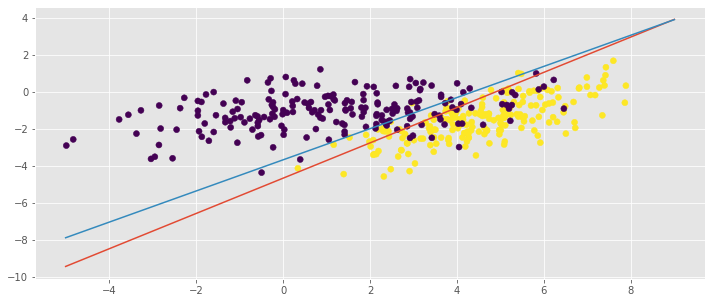

In [477]:
#%%pycodestyle
from sklearn.metrics import accuracy_score
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


my_log_clf = MySGDClassifier(batch_generator, C=10000, alpha=0.01,
                             max_epoch=10000, model_type='log_reg')
my_lin_clf = MySGDClassifier(batch_generator, C=10000, alpha=0.01,
                             max_epoch=10000, model_type='lin_reg')
my_log_clf.fit(X, y, X.shape[0])
my_lin_clf.fit(X, y, X.shape[0])

plot_decision_boundary(my_log_clf)
plot_decision_boundary(my_lin_clf)

plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [478]:
from sklearn.datasets import make_classification


In [479]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

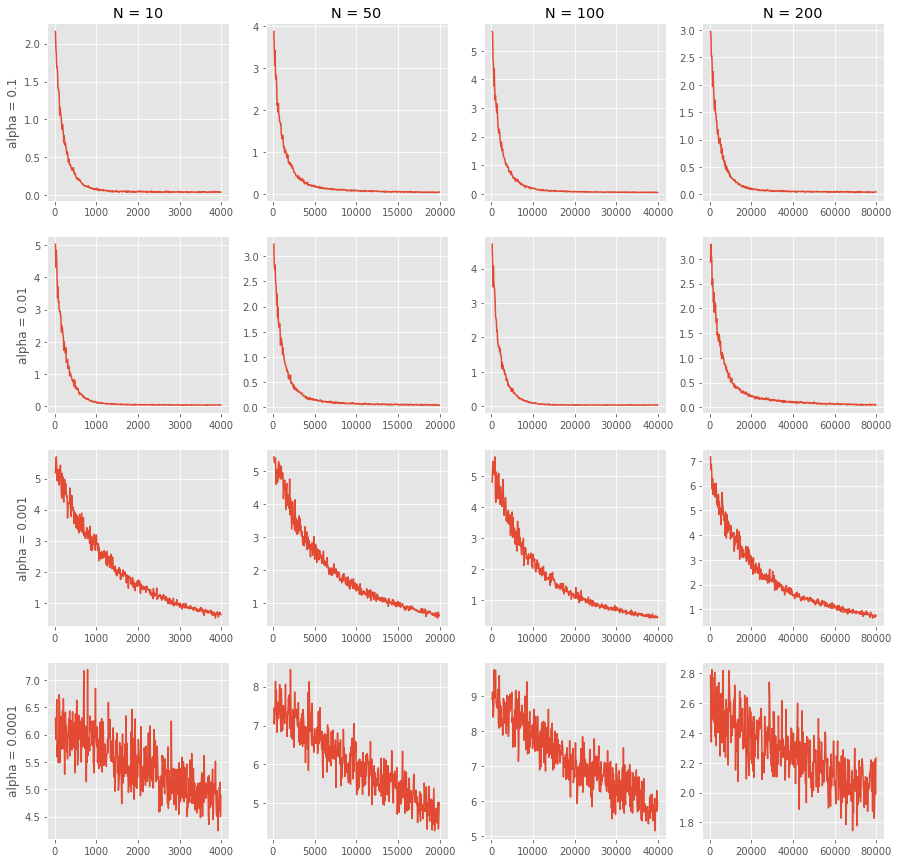

In [483]:
#%%pycodestyle
fig = plt.figure()
ax1 = fig.add_subplot(4, 4, 1)
ax1.set_title('N = 10')
ax1.set_ylabel('alpha = 0.1')
ax2 = fig.add_subplot(4, 4, 2)
ax2.set_title('N = 50')
ax3 = fig.add_subplot(4, 4, 3)
ax3.set_title('N = 100')
ax4 = fig.add_subplot(4, 4, 4)
ax4.set_title('N = 200')
ax5 = fig.add_subplot(4, 4, 5)
ax5.set_ylabel('alpha = 0.01')
ax6 = fig.add_subplot(4, 4, 6)
ax7 = fig.add_subplot(4, 4, 7)
ax8 = fig.add_subplot(4, 4, 8)
ax9 = fig.add_subplot(4, 4, 9)
ax9.set_ylabel('alpha = 0.001')
ax10 = fig.add_subplot(4, 4, 10)
ax11 = fig.add_subplot(4, 4, 11)
ax12 = fig.add_subplot(4, 4, 12)
ax13 = fig.add_subplot(4, 4, 13)
ax13.set_ylabel('alpha = 0.0001')
ax14 = fig.add_subplot(4, 4, 14)
ax15 = fig.add_subplot(4, 4, 15)
ax16 = fig.add_subplot(4, 4, 16)
fig.set_figheight(15)
fig.set_figwidth(15)

N = [10, 50, 100, 200]
alpha = [0.01, 0.01, 0.001, 0.0001]
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,
        ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
idx = 0
for a in alpha:
    for n in N:
        my_clf = MySGDClassifier(batch_generator, C=1000000, alpha=a,
                                 max_epoch=2, model_type='lin_reg')
        my_clf.fit(X, y, 500)
        avg_losses = np.array(my_clf.errors_log['loss'])
        avg_losses.reshape(-1, n).mean(axis=-1).ravel()
        axes[idx].plot(n * np.arange(avg_losses.shape[0])[2:], avg_losses[2:])
        idx = idx + 1

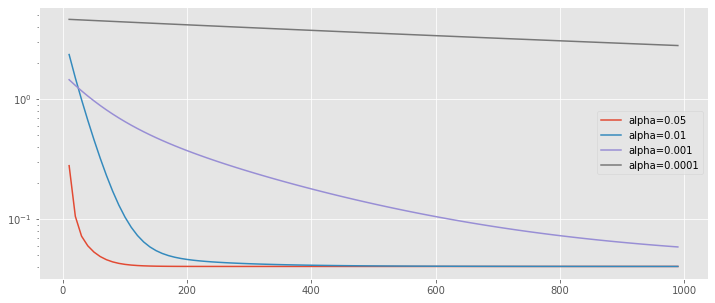

In [484]:
#%%pycodestyle
fig_2 = plt.figure()
N = 10
alpha = [0.05, 0.01, 0.001, 0.0001]
for a in alpha:
    my_clf = MySGDClassifier(batch_generator, C=100000,
                             alpha=a, max_epoch=1000, model_type='lin_reg')
    my_clf.fit(X, y, X.shape[0])
    avg_losses = np.array(my_clf.errors_log['loss'])
    avg_losses = avg_losses.reshape(-1, N).mean(axis=-1).ravel()
    plt.yscale('log')
    plt.plot(N * np.arange(avg_losses.shape[0])[1:],
             avg_losses[1:], label='alpha=' + str(a))
plt.legend()

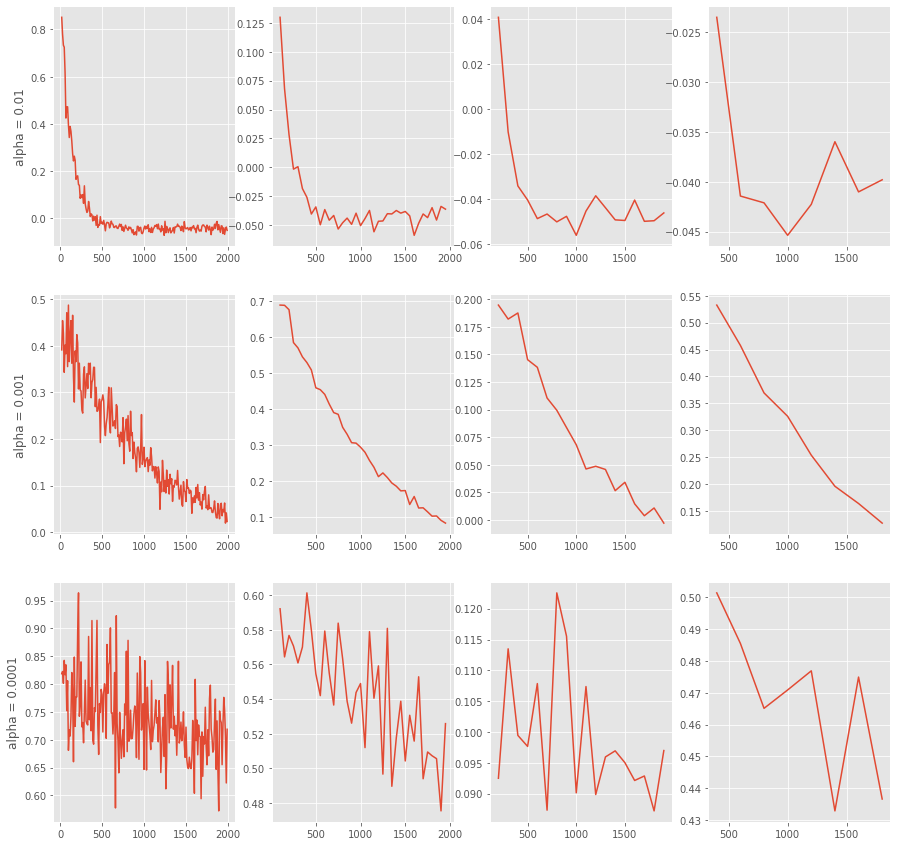

In [671]:
#%%pycodestyle
fig = plt.figure()

ax5 = fig.add_subplot(3, 4, 1)
ax5.set_ylabel('alpha = 0.01')
ax6 = fig.add_subplot(3, 4, 2)
ax7 = fig.add_subplot(3, 4, 3)
ax8 = fig.add_subplot(3, 4, 4)
ax9 = fig.add_subplot(3, 4, 5)
ax9.set_ylabel('alpha = 0.001')
ax10 = fig.add_subplot(3, 4, 6)
ax11 = fig.add_subplot(3, 4, 7)
ax12 = fig.add_subplot(3, 4, 8)
ax13 = fig.add_subplot(3, 4, 9)
ax13.set_ylabel('alpha = 0.0001')
ax14 = fig.add_subplot(3, 4, 10)
ax15 = fig.add_subplot(3, 4, 11)
ax16 = fig.add_subplot(3, 4, 12)
fig.set_figheight(15)
fig.set_figwidth(15)

N = [10, 50, 100, 200]
alpha = [0.01, 0.001, 0.0001]
axes = [ax5, ax6, ax7, ax8,
        ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
idx = 0
for a in alpha:
    for n in N:
        my_clf = MySGDClassifier(batch_generator, C=1000000000,
                                 alpha=a, max_epoch=2, model_type='log_reg')
        my_clf.fit(X, y, 100)
        avg_losses = np.array(my_clf.errors_log['loss'])
        avg_losses = avg_losses.reshape(-1, n).mean(axis=-1).ravel()
        axes[idx].plot(n * np.arange(avg_losses.shape[0])[2:], avg_losses[2:])
        idx = idx + 1

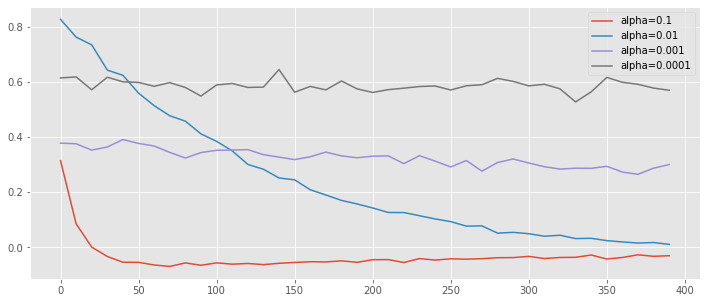

In [490]:
#%%pycodestyle
fig_2 = plt.figure()
N = 10
alpha = [0.1, 0.01, 0.001, 0.0001]
for a in alpha:
    my_clf = MySGDClassifier(batch_generator, C=100000,
                             alpha=a, max_epoch=4, model_type='log_reg')
    my_clf.fit(X, y, 1000)
    avg_losses = np.array(my_clf.errors_log['loss'])
    avg_losses = avg_losses.reshape(-1, N).mean(axis=-1).ravel()
    plt.plot(N * np.arange(avg_losses.shape[0]),
             avg_losses, label='alpha=' + str(a))
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше $\alpha$ тем быстрее сходимость, однако при слишком большом $\alpha$ есть вероятность "пролететь" точку минимума. Для того чтобы этого не происходило имеет смысл в процессе градиентного спуска постепенно уменьшать $\alpha$.
Тогда и вначале будет хорошая сходимость, и мы не "пролетим" точку минимма.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

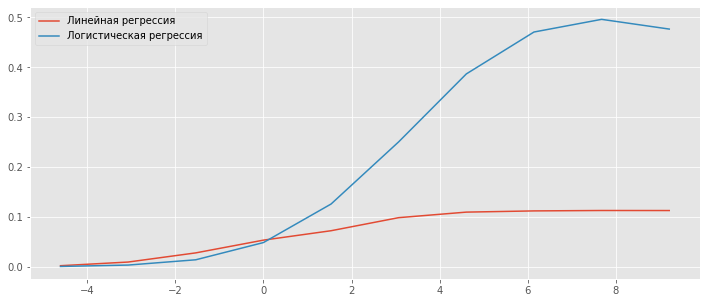

In [499]:
#%%pycodestyle
fig = plt.figure()
C = np.logspace(4, -2, 10)
weights_lin = []
weights_log = []
for c in C:
    my_lin_clf = MySGDClassifier(batch_generator, C=c, alpha=0.001,
                                 max_epoch=2, model_type='lin_reg')
    my_log_clf = MySGDClassifier(batch_generator, C=c, alpha=0.001,
                                 max_epoch=2, model_type='log_reg')
    my_lin_clf.fit(X, y, 10)
    my_log_clf.fit(X, y, 10)
    weights_lin.append(np.abs(my_lin_clf.weights).mean())
    weights_log.append(np.abs(my_log_clf.weights).mean())

plt.plot(np.log(C), weights_lin, label='Линейная регрессия')
plt.plot(np.log(C), weights_log, label='Логистическая регрессия')
plt.legend()

In [520]:
print(C)

[1.00000000e+04 2.15443469e+03 4.64158883e+02 1.00000000e+02
 2.15443469e+01 4.64158883e+00 1.00000000e+00 2.15443469e-01
 4.64158883e-02 1.00000000e-02]


Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Да, на графиках видно, что для обех регрессий (для логистической в большей мере) при уменьшении С (увеличении влияния регуляризации) веса уменьшаются.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [154]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [155]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [156]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [521]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GroupKFold

In [609]:
#%%pycodestyle
scores = []
N = np.arange(500, X_train.shape[0], 500)
my_clf = MySGDClassifier(batch_generator, border=0.5, C=100000,
                         alpha=0.01, max_epoch=1000, model_type='log_reg')
for n in N:
    my_clf.fit(X_train, y_train, n)
    y_pred = my_clf.predict(X_train)
    scores.append((f1_score(y_train, y_pred), n))

my_clf.fit(X_train, y_train, X.shape[0])
y_pred = my_clf.predict(X_train)
scores.append((f1_score(y_train, y_pred), X_train.shape[0]))

print(scores)
print(max(scores))


[(0.5223027068242471, 500), (0.5266148891835575, 1000), (0.5204023533877397, 1500), (0.5231586940015186, 2000), (0.5230476190476191, 2500), (0.5233929250665653, 3000), (0.5204178537511871, 3500), (0.5180491551459294, 4000), (0.527677382537569, 4500), (0.527677382537569, 5000), (0.5150579150579151, 5500), (0.5145052833813641, 6000), (0.52362658470995, 6500), (0.5111412516954079, 7000), (0.519396139881521, 7500), (0.5112229102167183, 8000), (0.5163902815271886, 8500), (0.5220546114187512, 9000), (0.5145631067961165, 9500), (0.5136548518303311, 10000), (0.5227963525835867, 10500), (0.5196489889355207, 11000), (0.5277566539923955, 11500), (0.5123361603700848, 11690)]
(0.5277566539923955, 11500)


In [658]:
#%%pycodestyle
my_clf = MySGDClassifier(batch_generator, border=0.5, C=100000,
                         alpha=0.01, max_epoch=10000, model_type='log_reg')
my_clf.fit(X_train, y_train, X_train.shape[0])
y_pred = my_clf.predict(X_train)
f1_score(y_train, y_pred)

0.5230244457077885

In [626]:
#%%pycodestyle
scores = []
N = np.arange(1000, X_train.shape[0], 1000)
my_clf = MySGDClassifier(batch_generator, border=0.5, C=100000,
                         alpha=0.01, max_epoch=1000, model_type='lin_reg')
for n in N:
    my_clf.fit(X_train, y_train, n)
    y_pred = my_clf.predict(X_train) - 0.5
    y_pred[y_pred < 0] = 0
    y_pred[y_pred > 0] = 1
    scores.append((f1_score(y_train, y_pred.astype(int)), n))

my_clf.fit(X_train, y_train, X.shape[0])
y_pred = my_clf.predict(X_train)
scores.append((f1_score(y_train, y_pred.astype(int)), X_train.shape[0]))

print(scores)
print(max(scores))

[(0.46989422294548416, 1000), (0.4422708909206889, 2000), (0.4630803845367151, 3000), (0.591673469387755, 4000), (0.36487716105550494, 5000), (0.3593714415850604, 6000), (0.018213866039952998, 7000), (0.5042503863987635, 8000), (0.5364140480591498, 9000), (0.0, 10000), (0.588906497622821, 11000), (0.017058823529411765, 11690)]
(0.591673469387755, 4000)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [634]:
#%%pycodestyle
C = [1, 100, 10000]
alpha = [0.1, 0.01, 0.001]
max_epoch = [1000, 2000, 5000]
mean_scores = []

group_kfold = GroupKFold(n_splits=3)
for c in C:
    for a in alpha:
        for epoch in max_epoch:
            my_clf = MySGDClassifier(batch_generator, border=0.5, C=c,
                                     alpha=a, max_epoch=epoch, model_type='log_reg')
            my_score = cross_val_score(my_clf, X_train, y_train,
                                       groups=groups_train,
                                       cv=group_kfold, scoring='f1').mean()
            mean_scores.append((my_score, c, a, epoch))
print(mean_scores)
print(max(mean_scores))

[(0.15955876641031616, 1, 0.1, 1000), (0.17675562305633905, 1, 0.1, 2000), (0.15955876641031616, 1, 0.1, 5000), (0.22754382280965194, 1, 0.01, 1000), (0.22754382280965194, 1, 0.01, 2000), (0.22754382280965194, 1, 0.01, 5000), (0.21677206441035354, 1, 0.001, 1000), (0.22663444713847594, 1, 0.001, 2000), (0.22754382280965194, 1, 0.001, 5000), (0.5147311074812913, 100, 0.1, 1000), (0.5142266204639828, 100, 0.1, 2000), (0.5134823471890061, 100, 0.1, 5000), (0.5061647324143356, 100, 0.01, 1000), (0.525816956133068, 100, 0.01, 2000), (0.5163277315873255, 100, 0.01, 5000), (0.35614459953039845, 100, 0.001, 1000), (0.4053865748943329, 100, 0.001, 2000), (0.5127808166968173, 100, 0.001, 5000), (0.5211681247483405, 10000, 0.1, 1000), (0.5242576495374003, 10000, 0.1, 2000), (0.524668467760431, 10000, 0.1, 5000), (0.5123027011833614, 10000, 0.01, 1000), (0.5133787097136654, 10000, 0.01, 2000), (0.523004660773056, 10000, 0.01, 5000), (0.37150127580054454, 10000, 0.001, 1000), (0.40390648902801907, 

In [645]:
#%%pycodestyle
my_clf = MySGDClassifier(batch_generator, border=0.5, C=10000,
                         alpha=0.01, max_epoch=10000, model_type='log_reg')
my_clf.fit(X_train, y_train, X_train.shape[0])
y_pred = my_clf.predict(X_train)
f1_score(y_train, y_pred)

0.5247581104154808

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [651]:
#%%pycodestyle
border = np.arange(0.1, 0.32, 0.05)
group_kfold = GroupKFold(n_splits=3)
mean_scores = []
for b in border:
    my_clf = MySGDClassifier(batch_generator, border=b, C=10000,
                             alpha=0.01, max_epoch=10000, model_type='log_reg')
    my_score = cross_val_score(my_clf, X_train, y_train, groups=groups_train,
                               cv=group_kfold, scoring='f1').mean()
    mean_scores.append((my_score, b))
    
mean_scores

[(0.4870561029865615, 0.1),
 (0.5258377873887797, 0.15000000000000002),
 (0.5855858397703316, 0.20000000000000004),
 (0.6046943619409599, 0.25000000000000006),
 (0.608396198709571, 0.30000000000000004)]


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [350]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [356]:
X_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
print (X_test.shape)

(16627, 15)


In [653]:
%%time
#%%pycodestyle

my_clf = MySGDClassifier(batch_generator, border=0.275, C=10000,
                         alpha=0.01, max_epoch=10000, model_type='log_reg')
my_clf.fit(X_train, y_train)
y_pred = my_clf.predict(X_train)
f1_score(y_train, y_pred)

Wall time: 25.7 s


0.6200106439595529

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

Ник: Борисов Алексей

In [659]:
#%%pycodestyle
y_pred = my_clf.predict(X_test)

my_ans = pd.DataFrame({'pair_id': range(11691, 11691 + y_pred.shape[0]),
                       'target': y_pred})
my_ans.to_csv('res.csv', index=False)

print(f1_score(y_train, y_pred_train))

0.6200296535921284


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***